### Cargar el archivo CSV
En esta celda, se importa el archivo `clean_earthquakes.csv` desde el directorio `data/processed`. 
Se utiliza la biblioteca `pandas` para cargar los datos en un DataFrame llamado `df`.

- **`Path(os.getcwd())`**: Obtiene el directorio actual de trabajo.
- **`df.head()`**: Muestra las primeras filas del DataFrame para verificar que los datos se cargaron correctamente.

In [66]:
#codigo para cargar el csv en jupyter
import pandas as pd
from pathlib import Path
import os
# Obtener la ruta del directorio actual (sin usar __file__)
current_dir = Path(os.getcwd())  # Obtiene el directorio actual de trabajo

# Construir la ruta relativa al archivo CSV
clean_csv_path = current_dir.parents[1] / 'data' / 'processed' / 'clean_earthquakes.csv'

# Cargar el CSV
df = pd.read_csv(clean_csv_path)
df.head()


,Date & Time UTC,Lat. degrees,Lon. degrees,Depth km,Region,Magnitude,Network,Country
0,2025-04-01 23:59:55.800,26.467,128.814,10,RYUKYU ISLANDS,5.1,SC4,JAPAN
1,2025-04-01 23:59:55.000,26.210,128.630,10,RYUKYU ISLANDS,5.1,BEO,JAPAN
2,2025-04-01 23:59:54.700,26.118,128.556,10,RYUKYU ISLANDS,5.1,GFZ,JAPAN
3,2025-04-01 23:59:54.100,26.060,128.500,10,RYUKYU ISLANDS,5.1,AUST,JAPAN
4,2025-04-01 23:59:53.700,26.020,128.510,10,RYUKYU ISLANDS,5.2,GSRAS,JAPAN


### Estadísticas descriptivas
En la siguiente celda, se utiliza el método `df.describe()` para generar estadísticas descriptivas de las columnas numéricas del DataFrame.

- **Propósito**: Obtener información como el promedio, desviación estándar, valores mínimos y máximos, y los percentiles de las columnas numéricas.

In [67]:
df.describe()

,Lat. degrees,Lon. degrees,Depth km,Magnitude
count,1.200811e+06,1.200871e+06,1.201719e+06,1.201719e+06
mean,2.477469e+01,1.334504e+01,3.937660e+01,3.691418e+00
std,2.534700e+01,9.197337e+01,8.273750e+01,1.218623e+00
min,-8.930000e+01,-1.800000e+02,-7.000000e+00,5.000000e-01
25%,1.268500e+01,-6.742800e+01,7.000000e+00,2.700000e+00
50%,3.629000e+01,2.454000e+01,1.000000e+01,3.500000e+00
75%,3.985000e+01,7.212600e+01,3.300000e+01,4.700000e+00
max,8.893900e+01,1.800900e+02,9.800000e+02,9.000000e+00


### Histograma de magnitudes
Aqui, generamos un histograma para visualizar la distribución de las magnitudes de los terremotos.

- **`np.arange()`**: Crea los límites de los bins (intervalos) con un paso de 0.1.
- **`sns.histplot()`**: Genera el histograma utilizando la biblioteca `Seaborn`.
- **Configuración**:
  - `bins`: Define los intervalos de las magnitudes.
  - `color`: Establece el color de las barras.
  - `kde=False`: Desactiva la curva de densidad.
- **Propósito**: Visualizar la frecuencia de los terremotos según su magnitud.

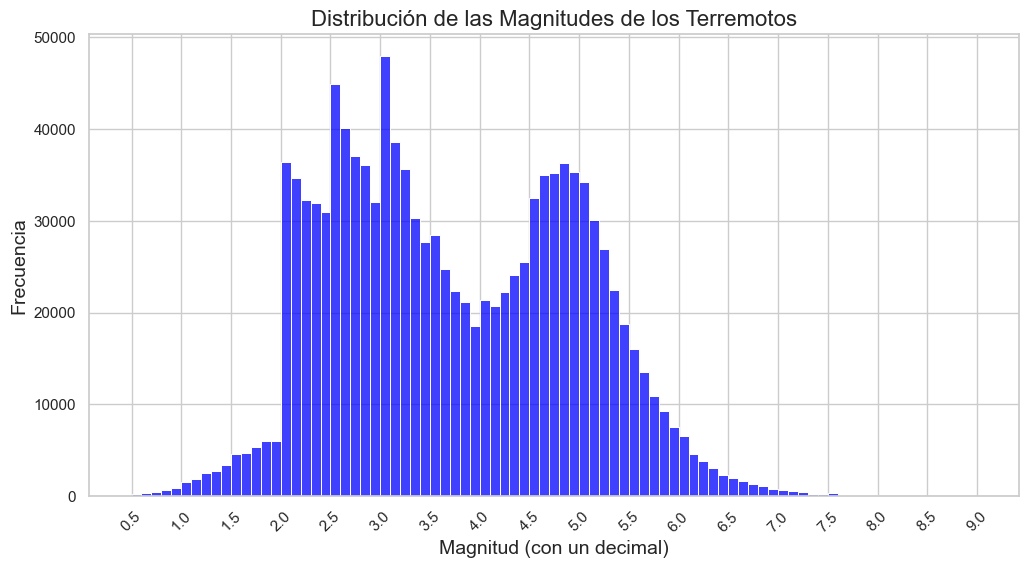

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear los límites de los bins (de 0.0 a 10.0 con pasos de 0.1)
bins = np.arange(df['Magnitude'].min(), df['Magnitude'].max() + 0.1, 0.1)

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Magnitude', bins=bins, color='blue', kde=False)

# Configurar el título y las etiquetas
plt.title('Distribución de las Magnitudes de los Terremotos', fontsize=16)
plt.xlabel('Magnitud (con un decimal)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar la gráfica
plt.xticks(ticks=np.arange(df['Magnitude'].min(), df['Magnitude'].max() + 0.5, 0.5), rotation=45)
plt.show()

En este histograma podemos ver un incremento repentino de la frecuencia de los terremotos al alcanzar ciertas magnitudes, concretamente magnitudes de 2, 2,5 y 3.

Esto podría ser porque algunas redes de sismógrafos solo registran terremotos de cierta magnitud.

Para comprobarlo, crearemos dos funciones. Una de ellas para comprobar cuantas redes SOLO registran terremotos de cierta magnitud o superiores y otra para ver cuales solo registran terremotos menores a cierta magnitud.

In [69]:
# Función para calcular redes que solo registran terremotos con magnitud >= límite
def redes_solo_mayores(df, limite):
    redes_solo = df.groupby('Network').filter(lambda x: x['Magnitude'].min() >= limite)['Network'].nunique()
    total_redes = df['Network'].nunique()
    redes_no_solo = total_redes - redes_solo
    return redes_solo, redes_no_solo

# Calcular para magnitud >= 3
redes_3, redes_no_3 = redes_solo_mayores(df, 3)

# Calcular para magnitud >= 2.5
redes_2_5, redes_no_2_5 = redes_solo_mayores(df, 2.5)

# Calcular para magnitud >= 2
redes_2, redes_no_2 = redes_solo_mayores(df, 2)

# Mostrar los resultados
print(f"Redes que SOLO registran terremotos de magnitud 3 o más: {redes_3}")
print(f"Redes que registran terremotos de magnitud menor a 3: {redes_no_3}\n")

print(f"Redes que SOLO registran terremotos de magnitud 2.5 o más: {redes_2_5}")
print(f"Redes que registran terremotos de magnitud menor a 2.5: {redes_no_2_5}\n")

print(f"Redes que SOLO registran terremotos de magnitud 2 o más: {redes_2}")
print(f"Redes que registran terremotos de magnitud menor a 2: {redes_no_2}")

Redes que SOLO registran terremotos de magnitud 3 o más: 64
Redes que registran terremotos de magnitud menor a 3: 186

Redes que SOLO registran terremotos de magnitud 2.5 o más: 91
Redes que registran terremotos de magnitud menor a 2.5: 159

Redes que SOLO registran terremotos de magnitud 2 o más: 157
Redes que registran terremotos de magnitud menor a 2: 93


In [70]:
# Función para calcular redes que solo registran terremotos con magnitud < límite
def redes_solo_menores(df, limite):
    redes_solo = df.groupby('Network').filter(lambda x: x['Magnitude'].max() < limite)['Network'].unique()
    return redes_solo

# Calcular para magnitud < 3
redes_menores_3 = redes_solo_menores(df, 3)

# Calcular para magnitud < 2.5
redes_menores_2_5 = redes_solo_menores(df, 2.5)

# Calcular para magnitud < 2
redes_menores_2 = redes_solo_menores(df, 2)

# Mostrar los resultados
print(f"Redes que SOLO registran terremotos de magnitud menor a 3: {len(redes_menores_3)}")
print(f"Redes que SOLO registran terremotos de magnitud menor a 2.5: {len(redes_menores_2_5)}")
print(f"Redes que SOLO registran terremotos de magnitud menor a 2: {len(redes_menores_2)}")

Redes que SOLO registran terremotos de magnitud menor a 3: 21
Redes que SOLO registran terremotos de magnitud menor a 2.5: 9
Redes que SOLO registran terremotos de magnitud menor a 2: 2


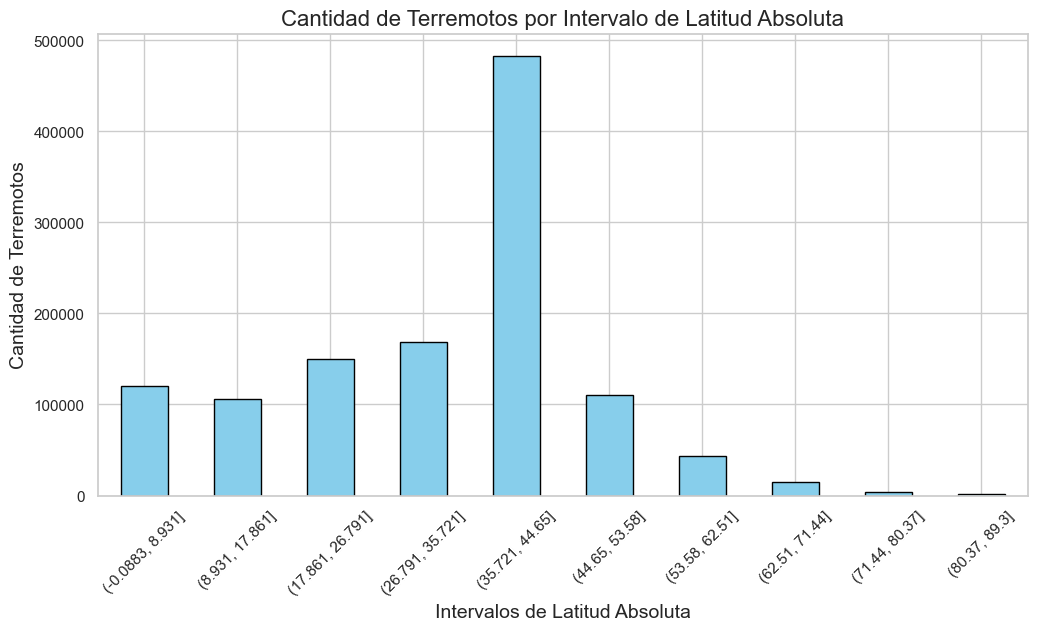

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear una nueva columna con el valor absoluto de la latitud
df['Abs_Latitude'] = df['Lat. degrees'].abs()

# Crear intervalos de latitud absoluta
df['Abs_Latitude_Bins'] = pd.cut(df['Abs_Latitude'], bins=10)  # Dividimos en 10 intervalos

# Contar terremotos por intervalo de latitud absoluta
abs_latitude_counts = df['Abs_Latitude_Bins'].value_counts().sort_index()

# Graficar la distribución
plt.figure(figsize=(12, 6))
abs_latitude_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de Terremotos por Intervalo de Latitud Absoluta', fontsize=16)
plt.xlabel('Intervalos de Latitud Absoluta', fontsize=14)
plt.ylabel('Cantidad de Terremotos', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [72]:
import statsmodels.api as sm

# Crear un DataFrame con los intervalos de latitud absoluta y la cantidad de terremotos
latitud_data = pd.DataFrame({
    'Abs_Latitude': [(interval.left + interval.right) / 2 for interval in abs_latitude_counts.index],  # Calcular el punto medio de cada intervalo
    'Terremotos': abs_latitude_counts.values       # Cantidad de terremotos en cada intervalo
})

# Modelo de regresión lineal
X = latitud_data['Abs_Latitude']
y = latitud_data['Terremotos']
X = sm.add_constant(X)  # Agregar una constante para el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Terremotos   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.683
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.231
Time:                        12:24:42   Log-Likelihood:                -131.30
No. Observations:                  10   AIC:                             266.6
Df Residuals:                       8   BIC:                             267.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.174e+05   8.65e+04      2.513   

c:\Users\adryg\miniconda3\envs\entorno_proyecto_1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [73]:
from scipy.stats import pearsonr

# Calcular la correlación entre latitud absoluta y cantidad de terremotos
correlation, p_value = pearsonr(latitud_data['Abs_Latitude'], latitud_data['Terremotos'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre la latitud absoluta y la cantidad de terremotos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la latitud absoluta afecta la cantidad de terremotos.")

Coeficiente de correlación de Pearson: -0.4169048088061691
Valor p: 0.23068516494565694
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la latitud absoluta afecta la cantidad de terremotos.


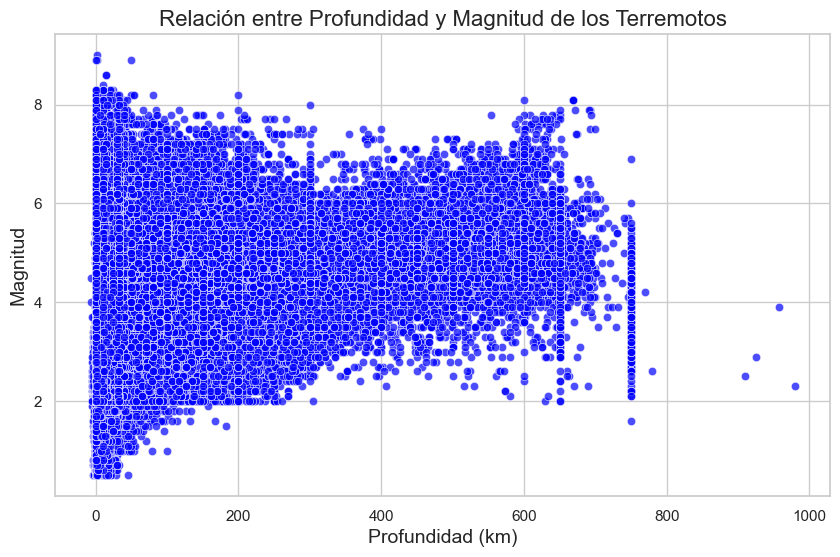

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depth km', y='Magnitude', alpha=0.7, color='blue')

# Configurar el título y las etiquetas
plt.title('Relación entre Profundidad y Magnitud de los Terremotos', fontsize=16)
plt.xlabel('Profundidad (km)', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)

# Mostrar la gráfica
plt.show()

In [75]:
import statsmodels.api as sm

# Crear el modelo de regresión lineal
X = df['Depth km']
y = df['Magnitude']
X = sm.add_constant(X)  # Agregar una constante para el modelo

model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                 8.029e+04
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:24:45   Log-Likelihood:            -1.9039e+06
No. Observations:             1201719   AIC:                         3.808e+06
Df Residuals:                 1201717   BIC:                         3.808e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5463      0.001   2975.188      0.0

In [76]:
from scipy.stats import pearsonr

# Calcular la correlación entre profundidad y magnitud
correlation, p_value = pearsonr(df['Depth km'], df['Magnitude'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre la profundidad y la magnitud.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la profundidad afecta la magnitud.")

Coeficiente de correlación de Pearson: 0.25025378313798224
Valor p: 0.0
Rechazamos la hipótesis nula: Existe una relación significativa entre la profundidad y la magnitud.
